# Compiler examples

## Reshape and reduce

B : [-0.12421347  1.75208579  0.89763061  0.50864496 -0.04195337  0.55330447
  0.38299568 -1.40967973  0.09673124  1.78871446  0.11156524  0.71896572
 -0.80143265  1.20806041  0.04874562  1.6158595  -2.80203849 -0.01842265
 -0.51055808 -0.04156813 -1.56309355  1.05736721 -1.1617745  -0.10882759
  1.73391922  2.09817312 -1.37244843 -1.27609915 -1.39785296 -1.22501732
  2.89693383 -0.49157892 -0.13045803 -0.1343032   1.07404408  0.93672926
  1.0004724   0.2359069  -2.5367315   1.10234444 -0.08139866  2.67426087
 -0.88132125  2.00227738 -1.00132034  0.97770868  0.06809289  0.46776756
 -0.5579801   3.22619789 -0.9912866  -1.04428347  1.13545688  1.10597008
 -1.54838721 -0.02579728  0.56232631 -0.49575338  0.11577963 -0.59166214]
C : [[-0.12421347  1.75208579  0.89763061  0.50864496 -0.04195337  0.55330447
   0.38299568 -1.40967973  0.09673124  1.78871446]
 [ 0.11156524  0.71896572 -0.80143265  1.20806041  0.04874562  1.6158595
  -2.80203849 -0.01842265 -0.51055808 -0.04156813]
 [-1.5630935

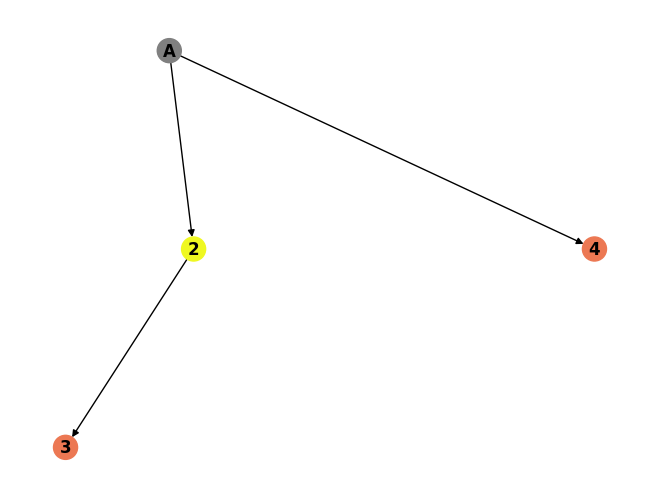

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.seterr(all="print")
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

join_and_split_axis_program = tc.compile("""
B[(ijk)] = A[i,j,k]
C[i,j] = B[(ij)]                                       
Row[j] = A[0,j,k]
""")

A = np.random.randn(3, 4, 5)
expected_B = A.reshape(60)
expected_C = expected_B.reshape(6, 10)
outputs = join_and_split_axis_program.execute(inputs={
    "A": A
}, shape_hints={
    "B": (60,),
    "C": (6,10),
    "Row": (4,)
})

print("B :", outputs["B"])
print("C :", outputs["C"])
print("Row :", outputs["Row"])

print("B ~= expected_B: ", np.allclose(outputs["B"], expected_B))
print("C ~= expected_C: ", np.allclose(outputs["C"], expected_C))

tc.viz.draw_program_graph(join_and_split_axis_program)

## Expressions with mutiple tensor orders

Positioning nodes


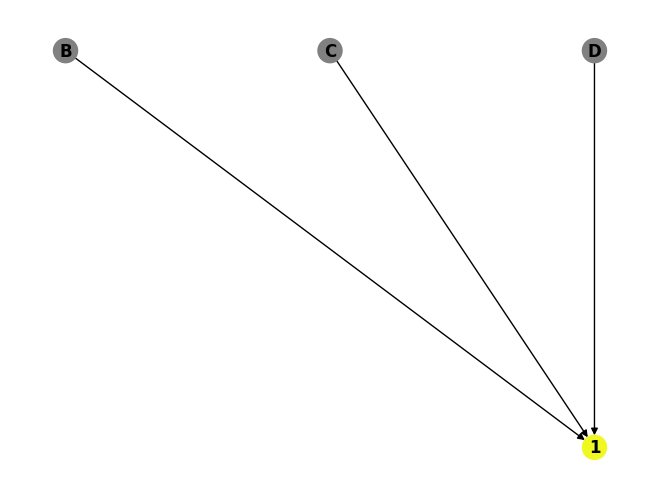

In [2]:
small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + C[i] + D + i")
tc.viz.draw_program_graph(small_program)

Positioning nodes


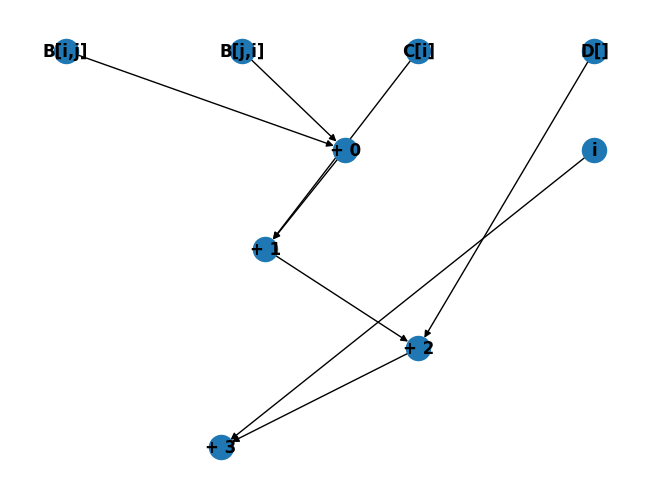

In [3]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [4]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + C + 100 + np.arange(10).reshape(-1,1)
result = small_program.execute({'B': B, 'C': C, 'D': 100}, shape_hints={'A': (10,10)})
print(expected)
print(result["A"])
np.all(result["A"] == expected)

[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121. 121.]
 [122. 122. 122. 122. 122. 122. 122. 122. 122. 122.]]
[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121

np.True_

## Min reduction

In [5]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] += (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

result = min_red_program.execute({'X': X}, shape_hints={'Min': (10,)})
print(result["Min"])
print(np.all(result["Min"] == expected))



[-2.64524844 -2.61887889 -2.17119701 -2.97983261 -3.23073581 -3.06974234
 -2.40992191 -2.61230737 -2.30111998 -3.01941901]
[-2.64524844 -2.61887889 -2.17119701 -2.97983261 -3.23073581 -3.06974234
 -2.40992191 -2.61230737 -2.30111998 -3.01941901]
True


## KMeans Kernel

Reducing the classic way
Reducing the classic way
Reducing the classic way
Min:  [2.1356111  2.98463245 1.99863996 0.         7.1981978  4.05982334
 3.03956298 0.         7.99922293 1.36691888 0.         2.72378239
 7.88845746 3.59873249 0.         6.76491681 2.81634018 5.57578366
 0.         4.68581573]
expected_min:  [2.1356111  2.98463245 1.99863996 0.         7.1981978  4.05982334
 3.03956298 0.         7.99922293 1.36691888 0.         2.72378239
 7.88845746 3.59873249 0.         6.76491681 2.81634018 5.57578366
 0.         4.68581573]
expected_Labels:  [1 1 2 3 0 2 3 0 1 0 1 0 1 1 2 2 1 2 4 1]
[ True  True  True  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True False]
Labels:  [1. 1. 2. 3. 0. 2. 3. 0. 1. 0. 1. 0. 1. 1. 2. 2. 1. 2. 4. 1.]
Dist ~= expected_Dist:  True
Min ~= expected_Min:  True
Labels ~= expected_Labels:  True
Count ~= expected_Count:  True
Update ~= expected_Update:  True
expected_Update: [[ 0.27323769  1.4071431   0.3

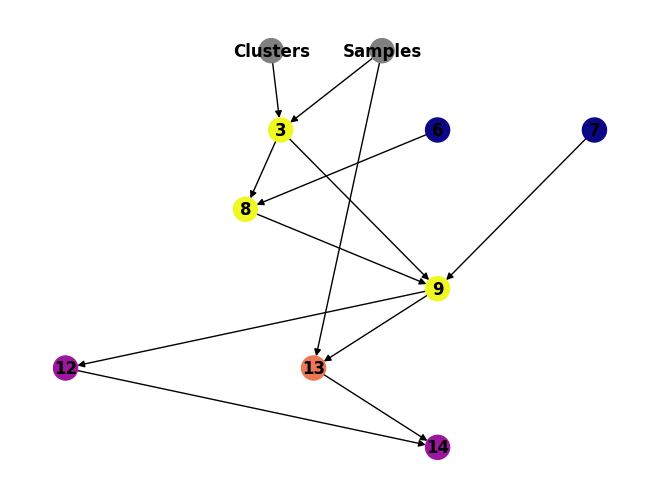

In [6]:
from scipy.spatial.distance import cdist
TOL = 1e-7

code = """
# Distance computation
Dist[j,k] += (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

n_samples = 20
sample_dim = 5
n_cluster = 5

Samples = np.random.randn(n_samples, sample_dim)
Clusters = Samples[np.random.randint(n_samples, size=n_cluster)]

# Compute expected labels
expected_Dist = cdist(Samples, Clusters, 'sqeuclidean')
expected_Min = np.min(expected_Dist, axis=1)
expected_Labels = expected_Dist.argmin(axis=1)

# Update cluster centers
expected_Count = np.zeros(n_cluster)
expected_Update = np.zeros((n_cluster, sample_dim))

for j in range(n_samples):
    l = expected_Labels[j]
    expected_Count[l] += 1
    expected_Update[l] += Samples[j]

expected_Update /= expected_Count.reshape(-1, 1)


outputs = kmeans_kernel.execute(inputs={
    'Samples': Samples,
    'Clusters': Clusters
}, shape_hints={
    'Dist': (n_samples, n_cluster),
    'Min': (n_samples,),
    'Labels': (n_samples,),
    'Count': (n_cluster,),
    'Update': (n_cluster, sample_dim)
})

print("Min: ", outputs['Min'])
print("expected_min: ", expected_Min)
print("expected_Labels: ", expected_Labels)
print(expected_Min == outputs['Min'])
print("Labels: ", outputs['Labels'])
print("Dist ~= expected_Dist: ", np.all(outputs['Dist'] == expected_Dist))
print("Min ~= expected_Min: ", np.allclose(outputs['Min'], expected_Min))
print("Labels ~= expected_Labels: ", np.all(outputs['Labels'] == expected_Labels))
print("Count ~= expected_Count: ", np.all(outputs['Count'] == expected_Count))
print("Update ~= expected_Update: ", np.allclose(outputs['Update'], expected_Update))
print(f"expected_Update: {expected_Update}")
print(f"Update: {outputs['Update']}")

draw_program_graph(kmeans_kernel, color_by="opcount")

Positioning nodes


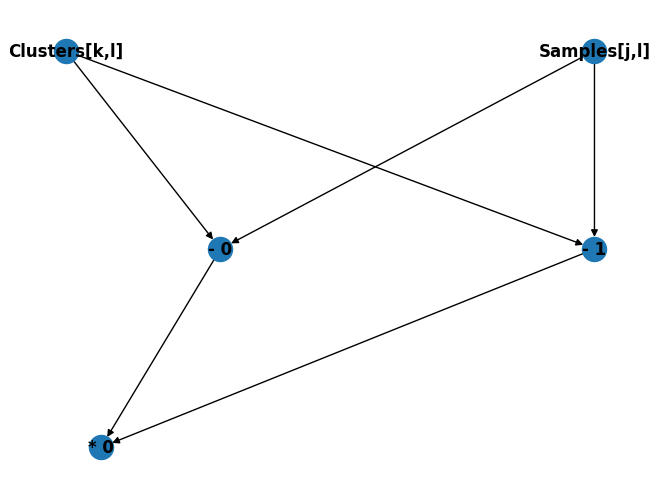

In [7]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

## Conjugate Gradient

Positioning nodes


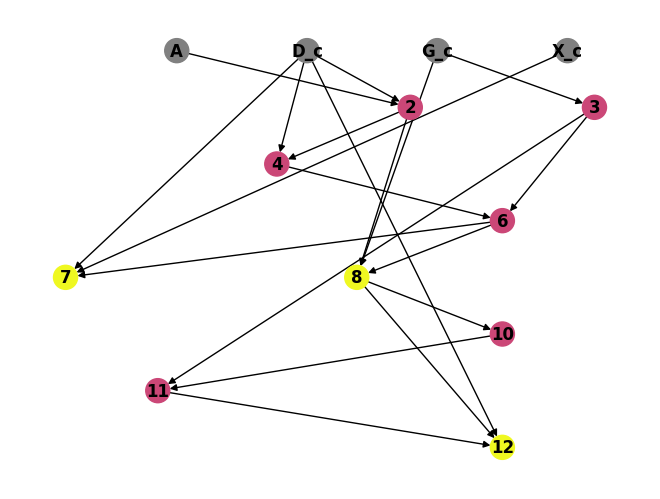

In [8]:
code = """
W_c[i] += A[i,j] * D_c[j]
Gamma_c += G_c[i] * G_c[i]
Theta_c += D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n += G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n += (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


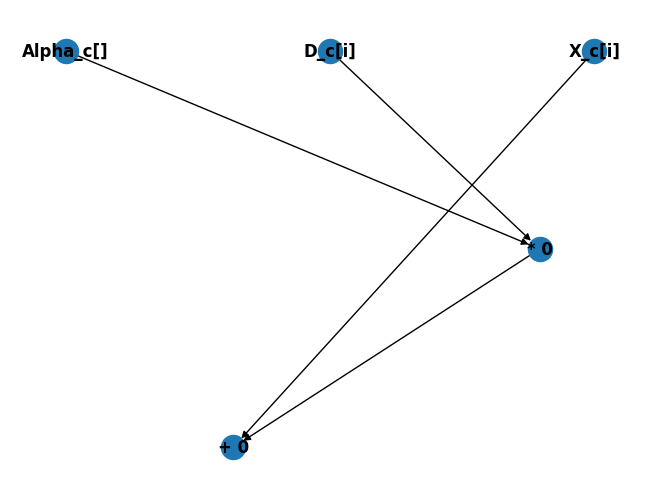

In [9]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

## Transformer (Multi-Head Attention)

**Constants**

- B: Batch Size
- L: Sequence Lenght
- M: Embedding Size
- H: Number of Atte Heads
- E: Head Embedding Size (M / H)
- Sqe: sqrt(E)


**Inputs**

- X: Samples (B x L x M)
- W(q|k|v): Query/Key/Value Weight Matrix (H x M x E)
- Wz: Linear Layer (M x M)


In [ ]:
code = """
# Query, Key, Value
Q[i,j,k,l] += X[i,k,m] * Wq[j,m,l] # (B x H x L x E) 
K[i,j,k,l] += X[i,k,m] * Wk[j,m,l] # (B x H x L x E) 
V[i,j,k,l] += X[i,k,m] * Wv[j,m,l] # (B x H x L x E) 

# Attention
A[i,j,k,m] += (Q[i,j,k,l] * K[i,j,m,l]) / Sqe # (B x H x L x L)
Denom[i,j,k] += e ^ A[i,j,k,m] # (B x H x L)
Softmax[i,j,k,m] = A[i,j,k,m] / Denom[i,j,k] # (B x H x L x L)

Atte[i,j,(kl)] += Softmax[i,k,j,m] * V[i,k,m,l] # (B x L x M)

# Linear
Z[i,j,l] += Atte[i,j,k] * Wz[k, l] # (B x L x M)
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')
